In [1]:
import os
from pathlib import Path
import requests
import zipfile
import tarfile
import shutil
from warnings import filterwarnings
filterwarnings('ignore')
def download_to_cache(url, filename, force_download=False):
    def _get_custom_cache_dir():
        custom_cache_dir = Path.home() / ".cache"/ "skmini"/ "datasets"
        os.makedirs(custom_cache_dir, exist_ok=True)
        return custom_cache_dir

    file_path = _get_custom_cache_dir() / filename
    if os.path.isfile(file_path) or os.path.isdir(file_path):
        if not force_download:
            print('File Aldready exists. Use force_download=True to force download.')
    else:
        force_download=True

    if force_download:
        try:
            if os.path.isfile(file_path) or os.path.isdir(file_path):
                shutil.rmtree(file_path)  # Remove the directory and all its contents
                print(f"Successfully deleted the directory and its contents: {file_path}")
        except OSError as e:
            print(f"Error: {e.strerror}")

        response = requests.get(url, stream=True, verify=False)
        print(response)
        with open(file_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
        print(f"Downloaded file to {file_path}")
        # now that it is downloaded, we might want to decompress the file
        if tarfile.is_tarfile(file_path):
            try:
                tar = tarfile.open(file_path)
                os.remove(file_path)
                tar.extractall(path = file_path)
                tar.close()
            except:
                print('Decompression Failed.')
        elif zipfile.is_zipfile(file_path): # change to endswith, which doesnt require us loading a library
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    print(file_path)
                    os.remove(file_path)
                    os.mkdir(file_path)
                    zip_ref.extractall(file_path)
            except: print('Decompression Failed.')


In [2]:
from sklearn import datasets
x = datasets.load_digits()
# print(x.shape)
x
# x.reshape((-1,28,28))

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

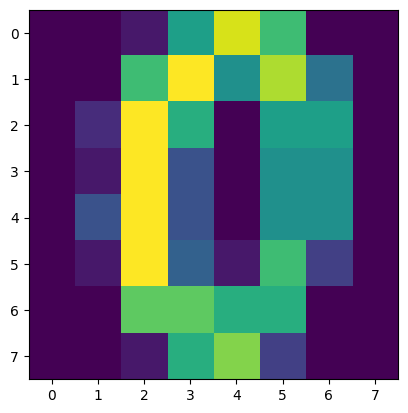

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x.images[10])

In [4]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

In [5]:
x = [0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0]
len(x)

65

In [1]:
from skmini.datasets import load_cifar10, load_iris, load_digits, load_diabetes, load_squad, load_imdb
data = load_imdb(force_download=False)

/home/arjun/.cache/skmini/datasets/imdb/aclImdb


In [8]:
data['data'][15003], data['target'][15003]

('Greetings again from the darkness. Remember all the "What happened to Woody Allen?" jokes? Even Mr. Allen poked fun at the fans who wanted him to continue making his same "funny" films. As with any great artist, Mr. Allen\'s craft evolved over the years and he lost some fans, while picking up others. Last year\'s masterpiece "Matchpoint" showed he is still every bit as relevant and poignant as he was in the days of "Annie Hall" and "Manhattan". What is most striking to us 40 plus year fans is that Mr. New York himself seems to have a bit of a crush on the mother country. Apparently he actually likes England!! While filming "Matchpoint", Mr. Allen became enamored with Scarlett Johansson and her real life spirit and sense of humor. This attraction motivated him to write his best comedy in years. Scarlett, while risking overexposure, must be given credit for not just picking films that cast her in some glamorous light. She is unafraid to look and act like a real person. In "Scoop", she 